In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

def plot_ablation(data1,data2,labels):
    """
    用于消融实验的结果可视化，包含两个子图，一个子图对应一个数据集，展示多个评估指标（Recall、F1、Accuracy）在不同数据集与不同模型变体上的表现
    
    参数：
    data1：3×6 的二维数组,第一个数据集的性能指标数据，3 行分别对应 Recall、F1、Accuracy,6 列对应 6 种方法
    data2：格式同data1,第二个数据集的性能指标数据
    labels：列表，x 轴刻度标签列表，需包含 3 个元素（对应 3 种评估指标的类别）

    配色：
    colors = sns.color_palette("Set2", n_colors=6)
    """
    # 使用ColorBrewer的Set2配色方案
    colors = sns.color_palette("Set2", n_colors=6)

    # Bar宽度
    bar_width = 0.15

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

    # 图例标签
    labels_legend = ['w/o CST', 'w/o FTE', 'w/o RTI', 'w/o MIB', 'w/o IBR', 'AuLAB']
    def plot_dual_axis(ax, data, title):
        ax2 = ax.twinx()
    
        for i in range(len(labels_legend)):
            if labels_legend[i] == 'AuLAB':
                ax.bar(np.arange(2) + i * bar_width, data[:2, i], bar_width, label=labels_legend[i],
                       color=colors[i], edgecolor='black', hatch='\\\\')
                ax2.bar(2 + i * bar_width, data[2, i], bar_width, color=colors[i], edgecolor='black', hatch='\\\\')
            else:
                ax.bar(np.arange(2) + i * bar_width, data[:2, i], bar_width, label=labels_legend[i],
                       color=colors[i], edgecolor='black')
                ax2.bar(2 + i * bar_width, data[2, i], bar_width, color=colors[i], edgecolor='black')
    
        ax.set_xlabel(title, fontsize=30,fontname="Times New Roman")
        ax.set_ylabel('Recall and F1', fontsize=30)
        ax2.set_ylabel('Accuracy', fontsize=30)
        ax.set_xticks(np.arange(3) + bar_width * (len(labels_legend) / 2 - 0.5))
        ax.set_xticklabels(labels, fontsize=30)
    
        # 动态设置y轴范围，不从0开始
        ax.set_ylim(data[:2].min() * 0.9, data[:2].max() * 1.1)  # 根据Recall和F1的最小值和最大值设置y轴范围
        ax2.set_ylim(data[2].min() * 0.7, data[2].max() * 1.1)   # 根据Accuracy的最小值和最大值设置y轴范围
    
        # 调大纵坐标刻度字体
        ax.tick_params(axis='y', labelsize=30)
        ax2.tick_params(axis='y', labelsize=30)
    
    # 绘制第一个子图
    plot_dual_axis(ax1, data1, '(a) OSM')
    
    # 绘制第二个子图
    plot_dual_axis(ax2, data2, '(b) Foursquare')
    
    # 添加合并后的图例，并确保其在顶部中央位置，调整间隔
    fig.legend(labels_legend, fontsize=30, loc='upper center', bbox_to_anchor=(0.5, 1.035), ncol=len(labels_legend), handletextpad=0.4, columnspacing=0.5)
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # 留出顶部空间给图例
    plt.savefig('plot.pdf', format='pdf', dpi=300, bbox_inches='tight')
    plt.show()

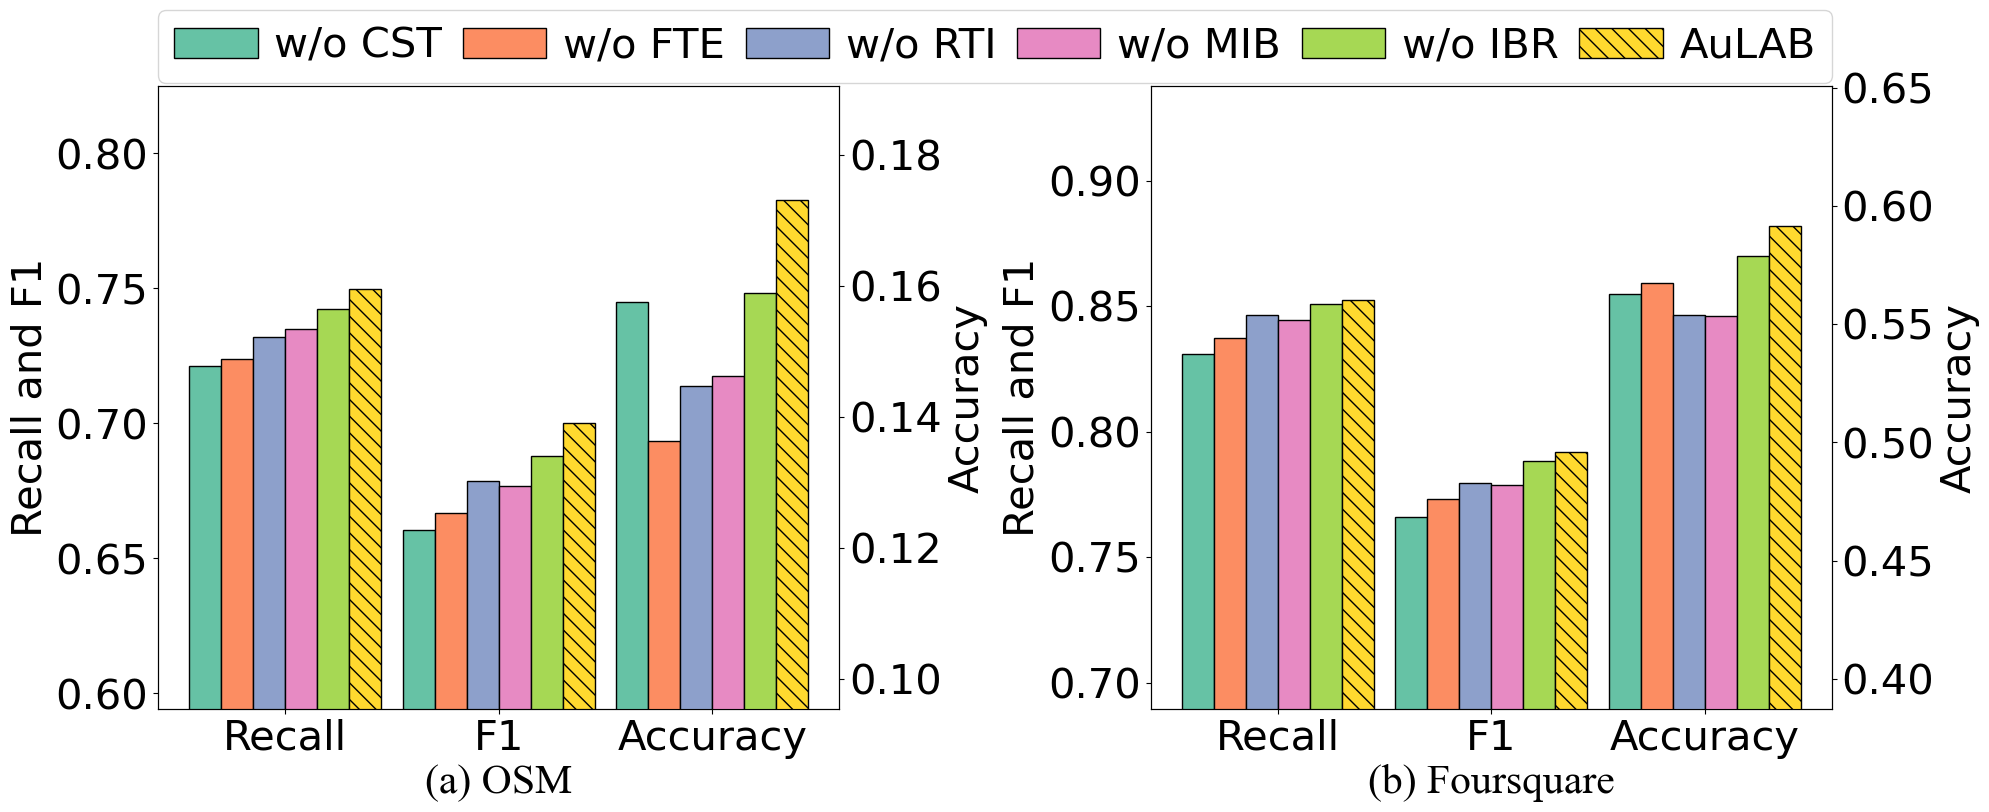

In [6]:
# 示例数据
labels = ['Recall', 'F1', 'Accuracy']
data1 = np.array([
    [0.7212, 0.7240, 0.7319, 0.7348, 0.7423, 0.7498],
    [0.6604, 0.6669, 0.6786, 0.6769, 0.6880, 0.7000],
    [0.1576, 0.1363, 0.1448, 0.1463, 0.1590, 0.1732]
])

data2 = np.array([
    [0.8308, 0.8373, 0.8465, 0.8447, 0.8508, 0.8524],
    [0.7662, 0.7731, 0.7797, 0.7788, 0.7882, 0.7918],
    [0.5628, 0.5674, 0.5537, 0.5535, 0.5787, 0.5913]
])

plot_ablation(data1,data2,labels)